In [1]:
# Activity 3.01: Bank Customer Segmentation for Loan Campaign

In [2]:
# Import libraries

#
import numpy as np
import pandas as pd
pd_default_format = pd.options.display.float_format
pd.options.display.float_format = '{:.2f}'.format


# data prep - scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# k-means
from sklearn.cluster import KMeans

# pca
from sklearn.decomposition import PCA

# visualization 
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [10, 10]


import seaborn as sns

In [3]:
# load data frame
fn= "./data/Bank_Personal_Loan_Modelling-1.csv"
bank_loan0 = pd.read_csv(fn, sep=",")

In [4]:
bank_loan0.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.00,2,0,0,0,0,0,1


In [5]:
bank_loan0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:
bank_loan0.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.00,2500.50,1443.52,1.00,1250.75,2500.50,3750.25,5000.00
Age,5000.00,45.34,11.46,23.00,35.00,45.00,55.00,67.00
Experience,5000.00,20.10,11.47,-3.00,10.00,20.00,30.00,43.00
Income,5000.00,73.77,46.03,8.00,39.00,64.00,98.00,224.00
ZIP Code,5000.00,93152.50,2121.85,9307.00,91911.00,93437.00,94608.00,96651.00
Family,5000.00,2.40,1.15,1.00,1.00,2.00,3.00,4.00
CCAvg,5000.00,1.94,1.75,0.00,0.70,1.50,2.50,10.00
Education,5000.00,1.88,0.84,1.00,1.00,2.00,3.00,3.00
Mortgage,5000.00,56.50,101.71,0.00,0.00,0.00,101.00,635.00
Personal Loan,5000.00,0.10,0.29,0.00,0.00,0.00,0.00,1.00


In [7]:
#bank_loan0['Age'].hist()
#bank_loan0['Income'].hist()
#plt.scatter(bank_loan0['Age'],bank_loan0['Mortgage'])

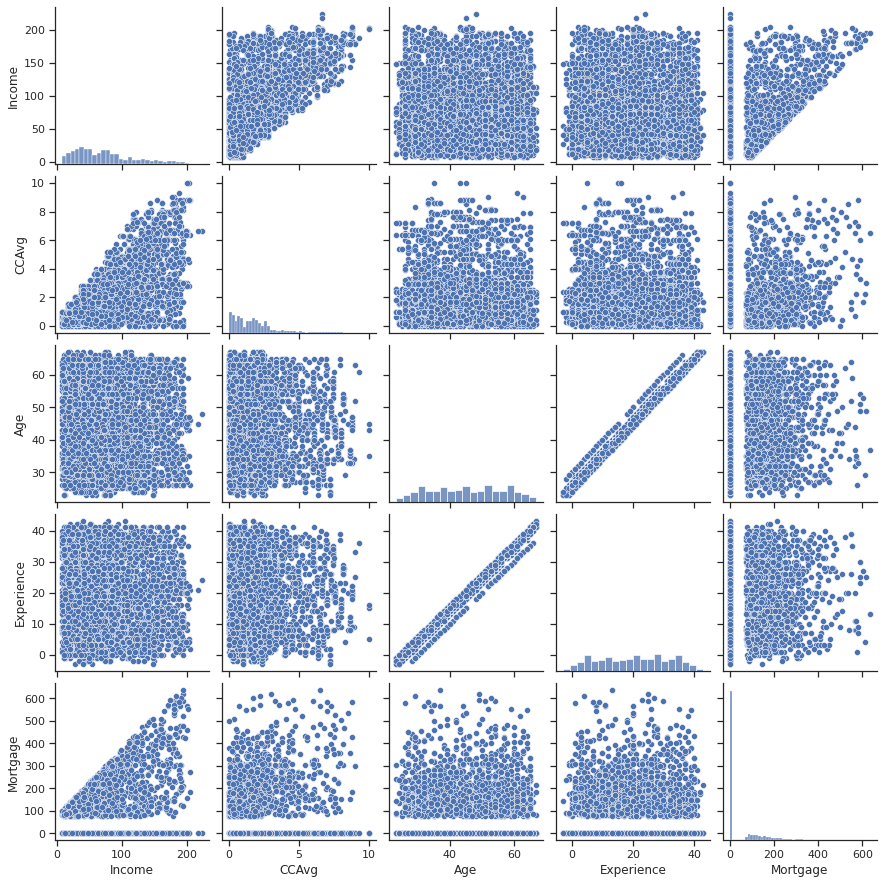

In [23]:
sns.set_theme(style="ticks")
sns.pairplot(bank_loan0[['Income', 'CCAvg', 'Age', 'Experience', 'Mortgage']])
#sns.displot(x="Income", data=bank_loan0, kde=True)

In [9]:
# Prep - scale data
cols_to_scale = ['Income', 'CCAvg']

# make a copy of the original data
data_scaled = bank_loan0.copy()

data_scaled[cols_to_scale] = scaler.fit_transform(bank_loan0[cols_to_scale])

pd.options.display.float_format = pd_default_format
data_scaled[cols_to_scale].describe()

,Income,CCAvg
count,5.000000e+03,5.000000e+03
mean,1.939449e-16,-2.078338e-17
std,1.000100e+00,1.000100e+00
min,-1.428969e+00,-1.108987e+00
25%,-7.554825e-01,-7.084116e-01
50%,-2.123482e-01,-2.506106e-01
75%,5.263146e-01,3.216407e-01
max,3.263712e+00,4.613525e+00


In [10]:
# Model Calculate K-means
n_clusters=3
random_state=42

# model parameters
model = KMeans(n_clusters=n_clusters, random_state=random_state)

# create model
model.fit(data_scaled[cols_to_scale])

KMeans(n_clusters=3, random_state=42)

In [11]:
# Group data points into clusters and add a column with cluster identifier
data_scaled['Cluster'] = model.predict(data_scaled[cols_to_scale])
data_scaled['Cluster'].value_counts()

1    2569
2    1793
0     638
Name: Cluster, dtype: int64

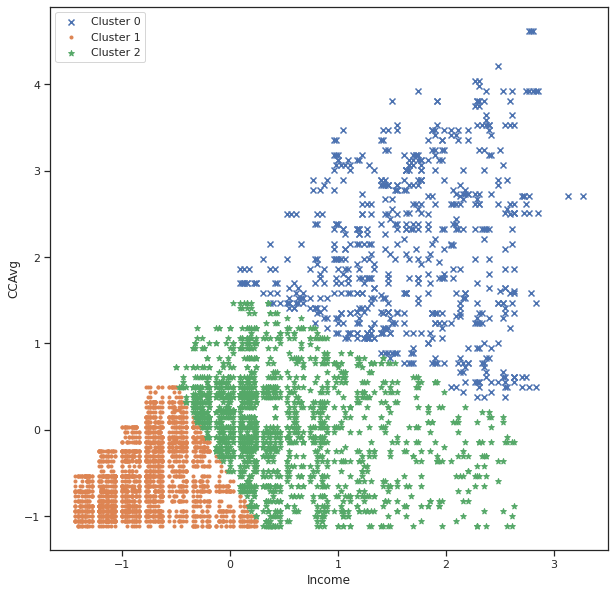

In [12]:
# Visualize Clusters
markers = ['x', '.', '*']
#marker_color = ['#8888ff', '#999729', '#FF0022']
for clust in range(n_clusters):
    temp = data_scaled[data_scaled.Cluster == clust]
    plt.scatter(temp.Income, temp.CCAvg, \
                marker=markers[clust], \
#                color = marker_color[clust],\
                label="Cluster "+str(clust))

plt.xlabel('Income')
plt.ylabel('CCAvg')
plt.legend()
plt.show()

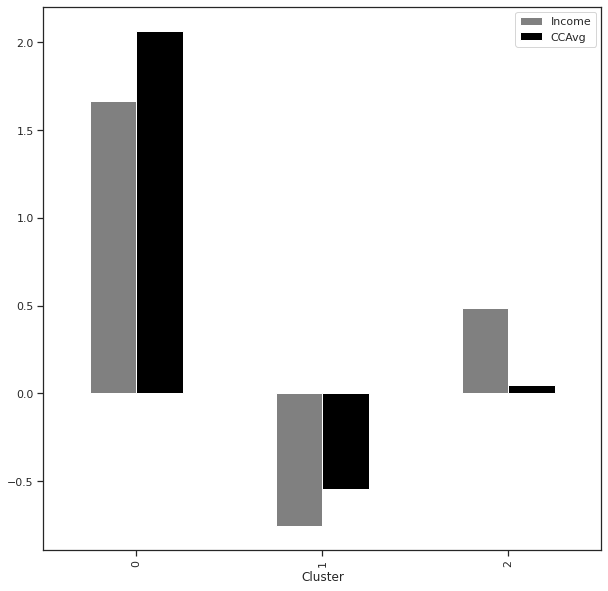

In [13]:
# Plot standarized values to get an idea of the grouping
data_scaled.groupby('Cluster')[['Income', 'CCAvg']].mean().plot.bar(color=['gray','black'])

plt.show()

In [14]:
# Add the Cluster information to the original data
bank_loan0['Cluster'] = data_scaled.Cluster

# and show Clusters in the context of other attributes
bank_loan0.groupby('Cluster')[['Age','Mortgage','Family','Income','CreditCard','Online','Personal Loan']].mean()


,Age,Mortgage,Family,Income,CreditCard,Online,Personal Loan
Cluster,,,,,,,
0,43.924765,89.537618,2.017241,150.390282,0.285266,0.605016,0.413793
1,45.797197,42.231218,2.513429,39.135072,0.294667,0.592448,0.000000
2,45.184049,65.185165,2.363636,96.142777,0.296152,0.600112,0.120468


# Activity 3.02: Bank Customer Segmentation with Multiple Features

- create customer segments to maximize the effectiveness of their personal loan campaign using PCA for visualizing the clusters.

In [15]:
# Prep - scale data
cols_to_scale = ['Income', 'CCAvg', 'Age', 'Experience', 'Mortgage']

# make a copy of the original data
data_scaled = bank_loan0.copy()

data_scaled[cols_to_scale] = scaler.fit_transform(bank_loan0[cols_to_scale])

pd.options.display.float_format = pd_default_format
data_scaled[cols_to_scale].describe()

,Income,CCAvg,Age,Experience,Mortgage
count,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03
mean,1.939449e-16,-2.078338e-17,2.478018e-17,-1.693312e-16,2.810197e-16
std,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00
min,-1.428969e+00,-1.108987e+00,-1.948906e+00,-2.014911e+00,-5.555239e-01
25%,-7.554825e-01,-7.084116e-01,-9.019702e-01,-8.812043e-01,-5.555239e-01
50%,-2.123482e-01,-2.506106e-01,-2.952359e-02,-9.121982e-03,-5.555239e-01
75%,5.263146e-01,3.216407e-01,8.429230e-01,8.629604e-01,4.375576e-01
max,3.263712e+00,4.613525e+00,1.889859e+00,1.996667e+00,5.688108e+00


In [16]:
# Model Calculate K-means
n_clusters=3
random_state=42

# model parameters
model = KMeans(n_clusters=n_clusters, random_state=random_state)

# create model
model.fit(data_scaled[cols_to_scale])

KMeans(n_clusters=3, random_state=42)

In [17]:
# Group data points into clusters and add a column with cluster identifier
data_scaled['Cluster'] = model.predict(data_scaled[cols_to_scale])
data_scaled['Cluster'].value_counts()

0    2164
2    2027
1     809
Name: Cluster, dtype: int64

In [18]:
# Perform PCA in two dimensions

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data_scaled[cols_to_scale])

# To see how much of the total information is contributed by each PC?
print("Explained variance ratios:", pca.explained_variance_ratio_)

Explained variance ratios: [0.40558453 0.33657253]


In [19]:
# add the columns
data_scaled['pc1'] = principalComponents[:,0]
data_scaled['pc2'] = principalComponents[:,1]

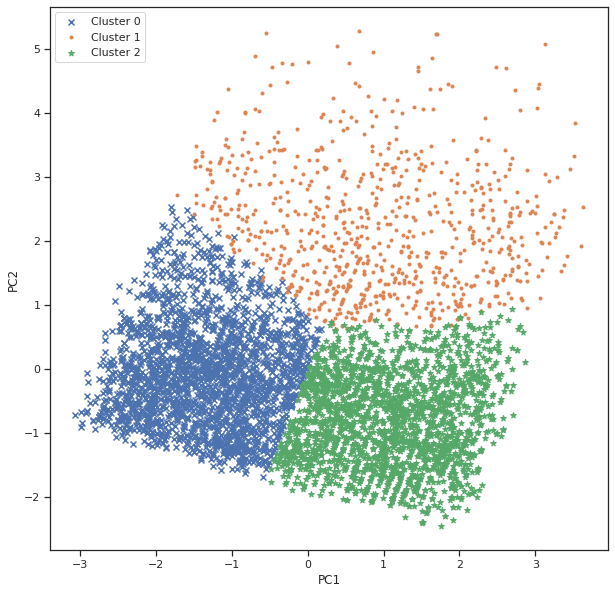

In [20]:
# Visualize Clusters
markers = ['x', '.', '*','-','|']
for clust in range(n_clusters):
    temp = data_scaled[data_scaled.Cluster == clust]
    plt.scatter(temp.pc1, temp.pc2, \
                marker=markers[clust], \
                label="Cluster "+str(clust))

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

<AxesSubplot:xlabel='Cluster'>

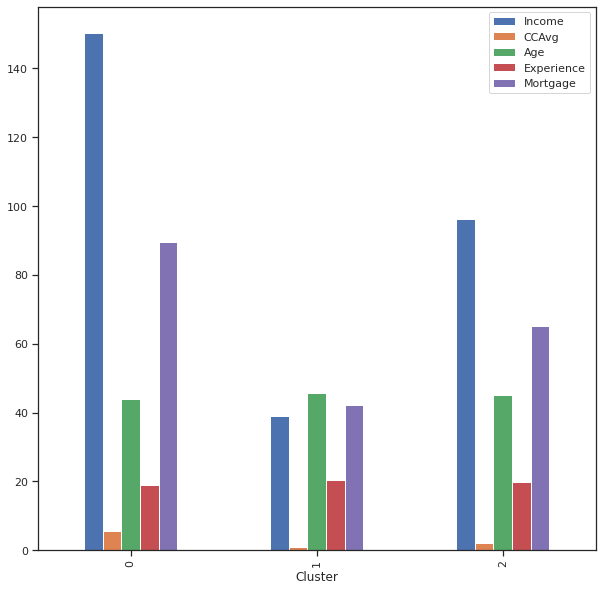

In [21]:
#data_scaled.groupby('Cluster')[cols_to_scale].mean().plot.bar()
bank_loan0.groupby('Cluster')[cols_to_scale].mean().plot.bar()

In [22]:
# and show Clusters in the context of other attributes
bank_loan0.groupby('Cluster')[cols_to_scale].mean()

,Income,CCAvg,Age,Experience,Mortgage
Cluster,,,,,
0,150.390282,5.540345,43.924765,18.890282,89.537618
1,39.135072,0.982417,45.797197,20.515376,42.231218
2,96.142777,2.025165,45.184049,19.948132,65.185165
